In [1]:
!pip install transformers
!pip install datasets #데이터 세트 다운로드 Hugging Face 연동

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.3 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

# CSV 파일 불러오기
df = pd.read_csv('/content/article_final.csv')

# AutoTokenizer 초기화
tokenizer = AutoTokenizer.from_pretrained("monologg/kobigbird-bert-base")

# NaN 값을 빈 문자열로 대체
df = df.dropna()

# title과 content 열을 띄어쓰기와 함께 합치기
df['text'] = df['title'] + ' ' + df['content']

# text 열의 각 행에 토크나이저 적용하고 토큰의 길이 구하기
token_lengths = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

# max, min, avg 길이 출력
print('Max Length:', np.max(token_lengths))
print('Min Length:', np.min(token_lengths))
print('Avg Length:', np.mean(token_lengths))


Token indices sequence length is longer than the specified maximum sequence length for this model (4846 > 4096). Running this sequence through the model will result in indexing errors


Max Length: 5182
Min Length: 50
Avg Length: 679.2412672623883


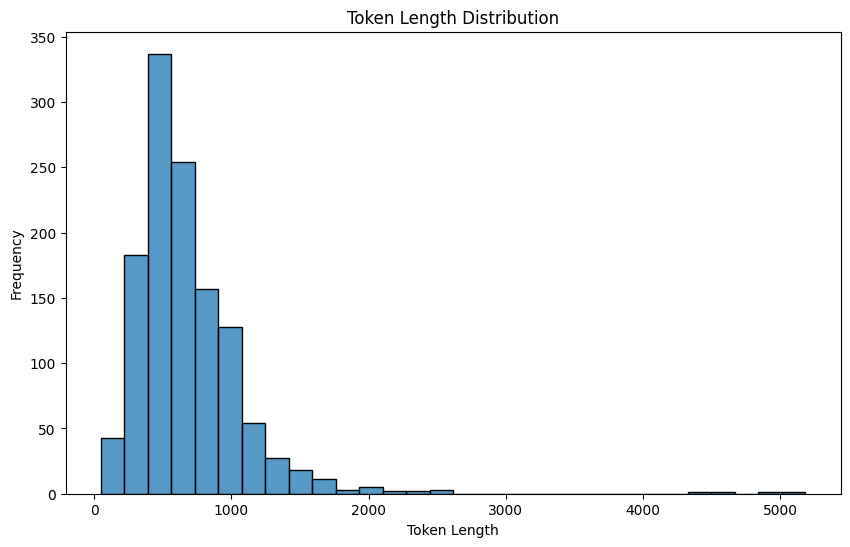

In [9]:
# 토큰 길이의 분포를 막대그래프로 그리기
plt.figure(figsize=(10, 6))
sns.histplot(token_lengths, kde=False, bins=30)
plt.title('Token Length Distribution')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
over_3072 = np.sum(token_lengths > 3072)
print('Number of articles with more than 3072 tokens:', over_3072)

Number of articles with more than 3072 tokens: 4
